## Analysis and Machine Learning Model


In [13]:
# Import our dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers.experimental.preprocessing import Normalization, CategoryEncoding
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import ReLU
from tensorflow.keras.models import Model


#  Import and read the data.csv.

amz_analisys_df = pd.read_csv("Resources/amz_ca_clean_8.csv")

amz_analisys_df

,stars,reviews,price,categoryName,isBestSeller,boughtInLastMonth,word_count,discount
0,4.4,834,18.9,Beauty,1,10000,9,0.0
1,4.3,1928,12.0,Beauty,1,9000,8,0.0
2,4.6,2066,12.0,Beauty,1,9000,20,0.0
3,4.7,2474,38.0,Beauty,1,7000,25,0.0
4,4.2,1062,29.0,Beauty,0,0,28,0.0
...,...,...,...,...,...,...,...,...
78719,4.4,103,62.0,Health Personal Care,0,100,15,0.0
78720,4.1,134,46.0,Health Personal Care,0,100,25,0.0
78721,4.5,61,54.0,Health Personal Care,0,100,29,0.0
78722,4.9,115,50.0,Health Personal Care,0,100,22,0.0


In [14]:
#calculate correlation matrix
numeric_columns = amz_analisys_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

correlation_matrix

,stars,reviews,price,isBestSeller,boughtInLastMonth,word_count,discount
stars,1.0,0.3,0.1,0.0,0.1,0.0,0.1
reviews,0.3,1.0,0.0,0.1,0.3,0.0,0.1
price,0.1,0.0,1.0,-0.0,-0.1,0.1,-0.1
isBestSeller,0.0,0.1,-0.0,1.0,0.2,0.0,0.0
boughtInLastMonth,0.1,0.3,-0.1,0.2,1.0,0.0,0.1
word_count,0.0,0.0,0.1,0.0,0.0,1.0,0.0
discount,0.1,0.1,-0.1,0.0,0.1,0.0,1.0


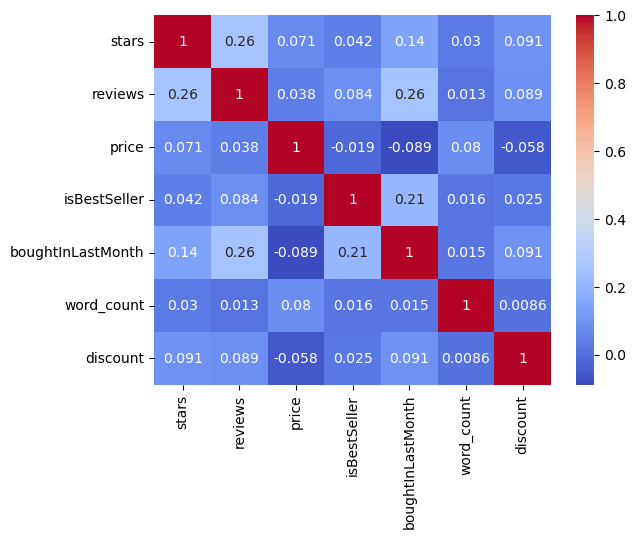

In [15]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [16]:
#summary statistics
pd.set_option('display.float_format', lambda x: '%.1f' % x)
summary_stats = amz_analisys_df.describe()
summary_stats

,stars,reviews,price,isBestSeller,boughtInLastMonth,word_count,discount
count,78724.0,78724.0,78724.0,78724.0,78724.0,78724.0,78724.0
mean,3.8,367.8,23.3,0.0,85.8,18.6,2.5
std,1.5,558.0,13.3,0.1,238.7,8.5,7.4
min,0.0,0.0,0.2,0.0,0.0,1.0,0.0
25%,4.0,11.0,13.5,0.0,0.0,12.0,0.0
50%,4.4,103.0,20.0,0.0,0.0,18.0,0.0
75%,4.6,472.0,30.0,0.0,100.0,25.0,0.0
max,5.0,2541.0,66.1,1.0,10000.0,79.0,89.1


In [17]:
#number of products sold in a month
count_boughtInLastMonth = amz_analisys_df['boughtInLastMonth'].value_counts()

print(count_boughtInLastMonth)

0        43933
50       14026
100       9838
200       4129
300       2051
400       1275
1000       898
500        785
600        545
700        381
800        355
900        237
2000       169
3000        65
4000        16
5000        10
6000         3
9000         3
10000        2
7000         2
8000         1
Name: boughtInLastMonth, dtype: int64


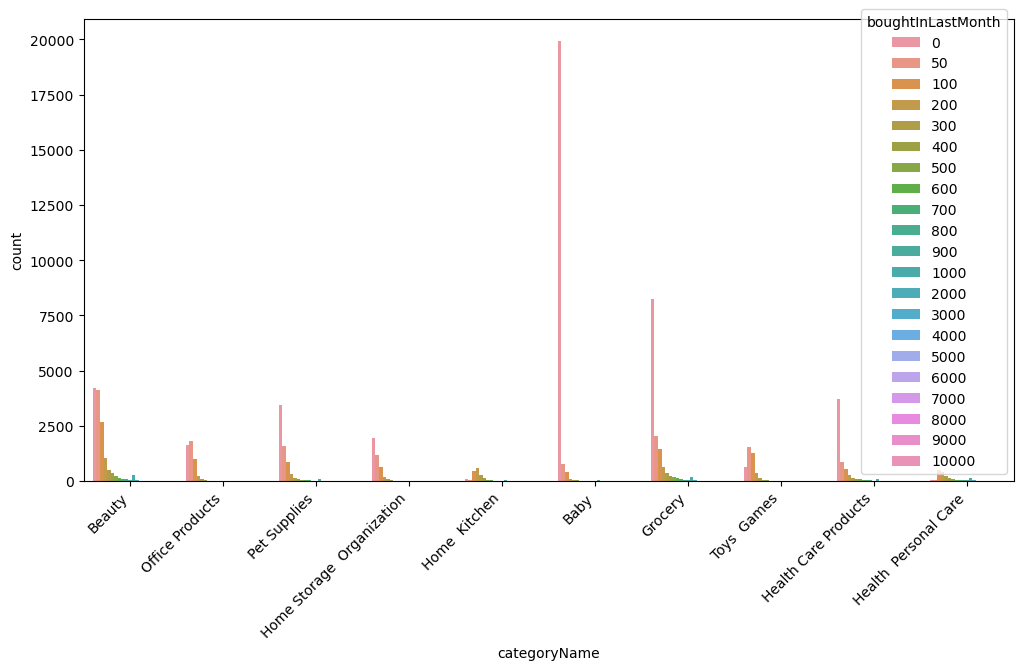

In [18]:
#shows the category of products according to sales in the last month
plt.figure(figsize=(12, 6)) 

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  
sns.countplot(x=amz_analisys_df['categoryName'], hue=amz_analisys_df['boughtInLastMonth'])
plt.show()


In [19]:
conteo_best_seller = amz_analisys_df['isBestSeller'].sum()

print(f'BestSeller iquals True: {conteo_best_seller}')

BestSeller iquals True: 905


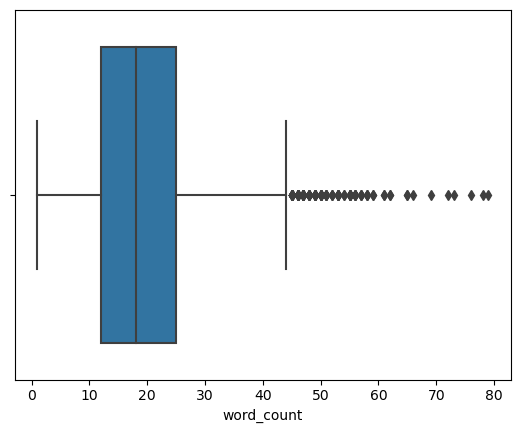

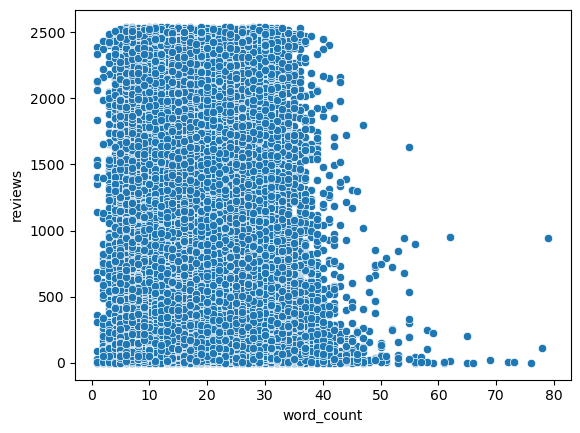

In [25]:
# Boxplot of a feature
sns.boxplot(x=amz_analisys_df['word_count'])
plt.show()


# Scatter plot between two features
sns.scatterplot(x=amz_analisys_df['word_count'], y=amz_analisys_df['reviews'])
plt.show()



In [26]:
# Look at CLASSIFICATION value counts for binning
classification = amz_analisys_df['categoryName'].value_counts()
classification

Baby                          21465
Beauty                        13976
Grocery                       13654
Pet Supplies                   6714
Health Care Products           5902
Office Products                4899
Toys  Games                    4228
Home Storage  Organization     4143
Home  Kitchen                  1889
Health  Personal Care          1854
Name: categoryName, dtype: int64

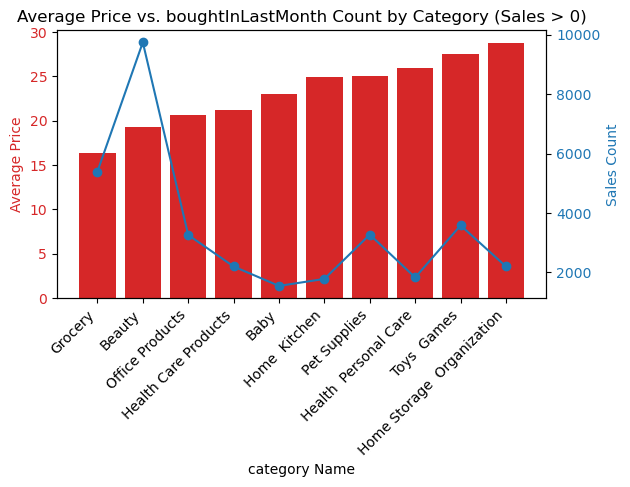

In [27]:
# Filtrar solo las filas con ventas superiores a 0
df_filtered = amz_analisys_df[amz_analisys_df['boughtInLastMonth'] > 0]

# Calculate the average price by category
average_price_by_category = df_filtered.groupby('categoryName')['price'].mean()

# Count the number of sales by category
sales_count_by_category = df_filtered.groupby('categoryName')['boughtInLastMonth'].count()

# Create a DataFrame with the results
data = pd.DataFrame({'Average Price': average_price_by_category, 'Sales Count': sales_count_by_category})

# Sort the DataFrame by average price
data = data.sort_values(by='Average Price')

# show the average price per category against the number of sales in last month
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('category Name')
ax1.set_ylabel('Average Price', color=color)
ax1.bar(data.index, data['Average Price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  #Instantiate a second y-axis for the number of sales
color = 'tab:blue'
ax2.set_ylabel('Sales Count', color=color)
ax2.plot(data.index, data['Sales Count'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)


ax1.set_xticks(range(len(data.index)))
ax1.set_xticklabels(data.index, rotation=45, ha='right')

fig.tight_layout()
plt.title('Average Price vs. boughtInLastMonth Count by Category (Sales > 0)')
plt.show()


## Machine Learning Model

In [28]:
# Determine the number of unique values in each column.
amz_analisys_df1 = amz_analisys_df.nunique()
amz_analisys_df1


stars                  41
reviews              2533
price                5449
categoryName           10
isBestSeller            2
boughtInLastMonth      21
word_count             69
discount             6828
dtype: int64

In [29]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_columns = ["categoryName"]
amz_analisys_df2 = pd.get_dummies(amz_analisys_df, columns=categorical_columns)
amz_analisys_df2

,stars,reviews,price,isBestSeller,boughtInLastMonth,word_count,discount,categoryName_Baby,categoryName_Beauty,categoryName_Grocery,categoryName_Health Personal Care,categoryName_Health Care Products,categoryName_Home Kitchen,categoryName_Home Storage Organization,categoryName_Office Products,categoryName_Pet Supplies,categoryName_Toys Games
0,4.4,834,18.9,1,10000,9,0.0,0,1,0,0,0,0,0,0,0,0
1,4.3,1928,12.0,1,9000,8,0.0,0,1,0,0,0,0,0,0,0,0
2,4.6,2066,12.0,1,9000,20,0.0,0,1,0,0,0,0,0,0,0,0
3,4.7,2474,38.0,1,7000,25,0.0,0,1,0,0,0,0,0,0,0,0
4,4.2,1062,29.0,0,0,28,0.0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78719,4.4,103,62.0,0,100,15,0.0,0,0,0,1,0,0,0,0,0,0
78720,4.1,134,46.0,0,100,25,0.0,0,0,0,1,0,0,0,0,0,0
78721,4.5,61,54.0,0,100,29,0.0,0,0,0,1,0,0,0,0,0,0
78722,4.9,115,50.0,0,100,22,0.0,0,0,0,1,0,0,0,0,0,0


In [30]:
# Split our preprocessed data into our features and target arrays
target = 'boughtInLastMonth'
X = amz_analisys_df2.drop(target, axis=1)
y = amz_analisys_df2[target]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X

,stars,reviews,price,isBestSeller,word_count,discount,categoryName_Baby,categoryName_Beauty,categoryName_Grocery,categoryName_Health Personal Care,categoryName_Health Care Products,categoryName_Home Kitchen,categoryName_Home Storage Organization,categoryName_Office Products,categoryName_Pet Supplies,categoryName_Toys Games
0,4.4,834,18.9,1,9,0.0,0,1,0,0,0,0,0,0,0,0
1,4.3,1928,12.0,1,8,0.0,0,1,0,0,0,0,0,0,0,0
2,4.6,2066,12.0,1,20,0.0,0,1,0,0,0,0,0,0,0,0
3,4.7,2474,38.0,1,25,0.0,0,1,0,0,0,0,0,0,0,0
4,4.2,1062,29.0,0,28,0.0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78719,4.4,103,62.0,0,15,0.0,0,0,0,1,0,0,0,0,0,0
78720,4.1,134,46.0,0,25,0.0,0,0,0,1,0,0,0,0,0,0
78721,4.5,61,54.0,0,29,0.0,0,0,0,1,0,0,0,0,0,0
78722,4.9,115,50.0,0,22,0.0,0,0,0,1,0,0,0,0,0,0


In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [32]:
# Create secuencial model
model = Sequential()

# Add layers
model.add(Dense(units=32, activation='relu', input_dim=16))  # 16 features
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=64, activation='tanh'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Output layer

## Compile, Train and Evaluate the Model

In [33]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [34]:
# Show model summmary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 256)               8448      
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 27,553
Trainable params: 27,553
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Train the model
fit_model_100_epochs = model.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
1846/1846 [==============================] - 2s 880us/step - loss: 51057.3594 - mae: 83.0498
Epoch 2/100
1846/1846 [==============================] - 2s 843us/step - loss: 45755.2305 - mae: 81.4230
Epoch 3/100
1846/1846 [==============================] - 2s 866us/step - loss: 44387.0977 - mae: 80.2138
Epoch 4/100
1846/1846 [==============================] - 2s 862us/step - loss: 43640.3789 - mae: 79.7750
Epoch 5/100
1846/1846 [==============================] - 2s 860us/step - loss: 43274.5000 - mae: 79.3685
Epoch 6/100
1846/1846 [==============================] - 2s 856us/step - loss: 42825.7734 - mae: 78.9131
Epoch 7/100
1846/1846 [==============================] - 2s 878us/step - loss: 42576.7305 - mae: 79.1494
Epoch 8/100
1846/1846 [==============================] - 2s 840us/step - loss: 42590.7383 - mae: 78.7007
Epoch 9/100
1846/1846 [==============================] - 2s 832us/step - loss: 42301.6133 - mae: 78.6960
Epoch 10/100
1846/1846 [==============================]

1846/1846 [==============================] - 2s 832us/step - loss: 30834.4922 - mae: 72.8741
Epoch 79/100
1846/1846 [==============================] - 2s 834us/step - loss: 29872.5742 - mae: 72.4875
Epoch 80/100
1846/1846 [==============================] - 2s 831us/step - loss: 30732.7090 - mae: 72.8956
Epoch 81/100
1846/1846 [==============================] - 2s 836us/step - loss: 30363.0293 - mae: 72.6689
Epoch 82/100
1846/1846 [==============================] - 2s 832us/step - loss: 30237.2480 - mae: 72.6354
Epoch 83/100
1846/1846 [==============================] - 2s 840us/step - loss: 29885.6797 - mae: 72.0191
Epoch 84/100
1846/1846 [==============================] - 2s 838us/step - loss: 29739.5059 - mae: 72.2931
Epoch 85/100
1846/1846 [==============================] - 2s 835us/step - loss: 30338.9043 - mae: 72.6149
Epoch 86/100
1846/1846 [==============================] - 2s 837us/step - loss: 28796.6621 - mae: 71.7013
Epoch 87/100
1846/1846 [==============================] - 2

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

616/616 - 0s - loss: 44067.5547 - mae: 76.7176 - 388ms/epoch - 630us/step
Loss: 44067.5546875, Accuracy: 76.71756744384766


In [37]:
# Export our model to HDF5 file
try:
    model.save("model_v8.h5")
    print("Model store in HDF5")
except Exception as e:
    print("Error:", e)

Model store in HDF5


## Prediction Test

In [39]:
# Assuming 'new_data' is a NumPy array containing your input data
new_data = np.array([2,10,71.99,0,18,10,0,0,0,1,0,0,0,0,0,0])

# Reformat input
new_data_reformat = np.reshape(new_data, (1, 16))

prediccion = model.predict(new_data_reformat)

print(prediccion)

1/1 [==============================] - 0s 14ms/step
[[56.979324]]
